Load historical data and store in csv file 

In [1]:
import os
import requests
import csv

API_KEY = "enter your api key"  
symbol = "AAPL"
output_folder = "project stock"  # folder name

url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&apikey={API_KEY}"

response = requests.get(url)
data = response.json()

daily_prices = data["Time Series (Daily)"]

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Save data to a CSV file in the folder
csv_file_path = os.path.join(output_folder, 'stock_prices.csv')
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Date', 'Closing Price'])
    for date, info in daily_prices.items():
        writer.writerow([date, info['4. close']])

print(f"Data saved to {csv_file_path}")


Data saved to project stock\stock_prices.csv


1. Model to predict next 3 day stock prices using historical data

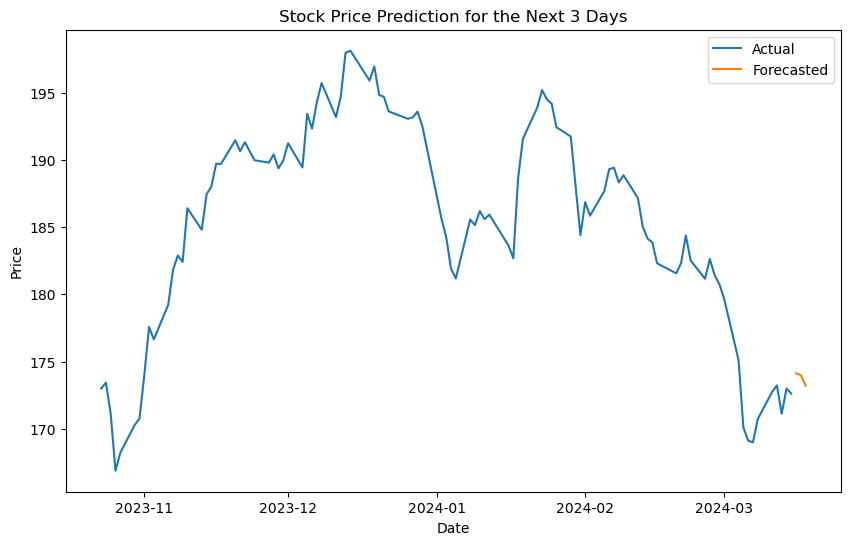

          Date  Forecasted Price
100 2024-03-16        174.122790
101 2024-03-17        173.994818
102 2024-03-18        173.219133


In [37]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load historical stock price data from CSV file
df = pd.read_csv(r"C:\Users\erhab\Downloads\project stock\project stock\stock_prices.csv")

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Find the last date in the historical data
last_date = df['Date'].max()

# Add one day to get the starting date for the forecast
forecast_start_date = last_date + pd.Timedelta(days=1)

# Forecast the next three days from the starting date
forecast_dates = pd.date_range(start=forecast_start_date, periods=3)
forecast = model_fit.forecast(steps=3)

# Create DataFrame for forecasted dates and prices
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted Price': forecast})

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Closing Price'], label='Actual')
plt.plot(forecast_df['Date'], forecast_df['Forecasted Price'], label='Forecasted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Prediction for the Next 3 Days')
plt.legend()
plt.show()

print(forecast_df)



2. Sentiment analysis on the news/twitter related to a particular stock.

In [7]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi import NewsApiClient

# Initialize News API client
newsapi = NewsApiClient(api_key='your API key')

def get_sentiment_score(article):
    if not article['content']:
        return 0
    sid = SentimentIntensityAnalyzer()
    return sid.polarity_scores(article['content'])['compound']

# Search for news articles about a stock
stock_symbol = "AAPL"
articles = newsapi.get_everything(q=stock_symbol, language="en", sort_by="publishedAt", page_size=100)

# Perform sentiment analysis
sentiment_scores = [get_sentiment_score(article) for article in articles['articles']]
num_articles = len(sentiment_scores)

if num_articles > 0:
    average_sentiment_score = sum(sentiment_scores) / num_articles
    print(f"Average Sentiment Score for {stock_symbol}: {average_sentiment_score}")
else:
    print("No articles found for sentiment analysis.")


Average Sentiment Score for AAPL: 0.33483699999999994


3. Compare two or more companies based on their industry.

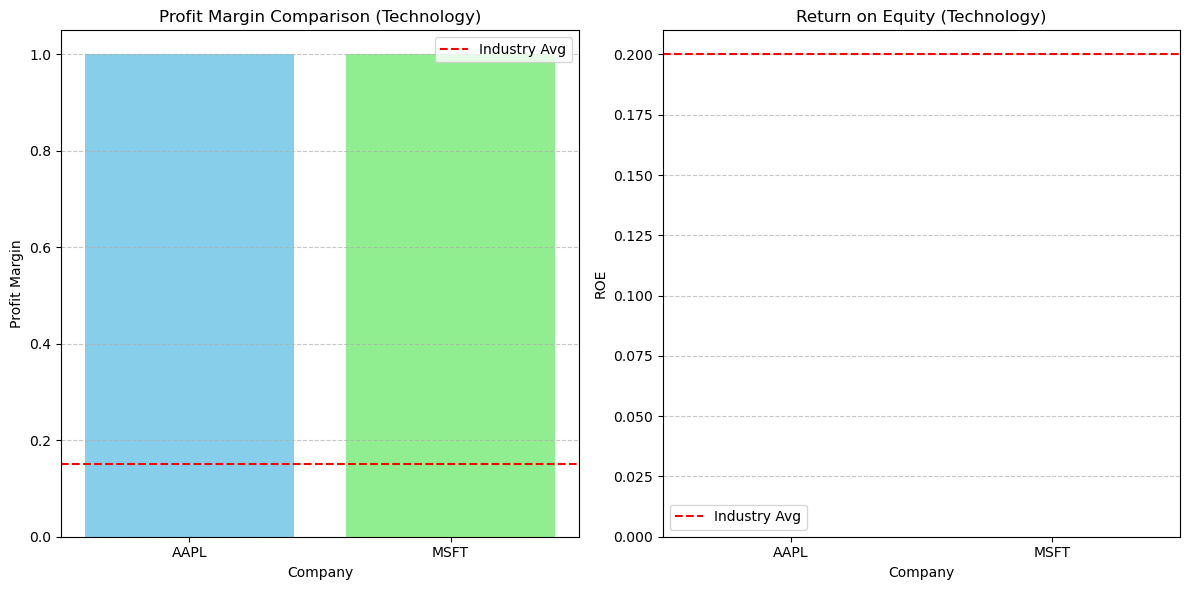


**AAPL (Technology)**
  - Profit Margin: 1.00
  - ROE: 0.00

**MSFT (Technology)**
  - Profit Margin: 1.00
  - ROE: 0.00


In [16]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Define tickers and industry for demonstration
tickers = ["AAPL", "MSFT"]
industry = "Technology"

# Fetch financial data for the tickers
financial_data = {}
for ticker in tickers:
    try:
        data = yf.Ticker(ticker).info
        financial_data[ticker] = {
            "Total Revenue": data.get("totalRevenue", None),
            "Cost Of Revenue": data.get("costOfRevenue", None),
            "Net Income": data.get("netIncome", None),
            "Total Stockholders' Equity": data.get("totalStockholdersEquity", None),
        }
    except Exception as e:
        print(f"Failed to fetch data for {ticker}: {e}")

# Check for missing data before conversion to DataFrame
if any(data is None for data in financial_data.values()):
    print("Warning: Missing data found for some companies. Ratios might be affected.")

# Convert data to pandas DataFrame (handle missing data)
financial_df = pd.DataFrame(financial_data).fillna(0)  # Replace missing values with 0

# Calculate financial ratios
ratios = {}
for ticker in tickers:
    try:
        revenue = financial_df.loc["Total Revenue", ticker]
        cost_of_goods_sold = financial_df.loc["Cost Of Revenue", ticker]
        net_income = financial_df.loc["Net Income", ticker]
        total_stockholders_equity = financial_df.loc["Total Stockholders' Equity", ticker]

        # Handle potential division by zero
        profit_margin = (revenue - cost_of_goods_sold) / revenue if revenue != 0 else 0
        roe = net_income / total_stockholders_equity if total_stockholders_equity != 0 else 0

        ratios[ticker] = {"Profit Margin": profit_margin, "ROE": roe}
    except KeyError:
        print(f"Data not available for some ratios ({ticker})")

# Industry averages (replace with actual industry averages)
industry_avg = {"Profit Margin": 0.15, "ROE": 0.2}

# Plot Profit Margin comparison
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
profit_margins = [ratios[ticker]["Profit Margin"] for ticker in tickers]
plt.bar(tickers, profit_margins, color=['skyblue', 'lightgreen'])
plt.axhline(y=industry_avg["Profit Margin"], color='r', linestyle='--', label='Industry Avg')
plt.xlabel("Company")
plt.ylabel("Profit Margin")
plt.title(f"Profit Margin Comparison ({industry})")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot ROE comparison
plt.subplot(1, 2, 2)
roes = [ratios[ticker]["ROE"] for ticker in tickers]
plt.bar(tickers, roes, color=['skyblue', 'lightgreen'])
plt.axhline(y=industry_avg["ROE"], color='r', linestyle='--', label='Industry Avg')
plt.xlabel("Company")
plt.ylabel("ROE")
plt.title(f"Return on Equity ({industry})")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Print ratios
for ticker, data in ratios.items():
    print(f"\n**{ticker} ({industry})**")
    print(f"  - Profit Margin: {data['Profit Margin']:.2f}")
    print(f"  - ROE: {data['ROE']:.2f}")


4. Search engine to make use of information retrieval techniques for searching.

In [11]:
# Sample document collection 
documents = {
  "doc1": "Apple is a technology company that designs, develops, and sells consumer electronics, computer software, and online services.",
  "doc2": "Microsoft is a multinational technology corporation that develops, manufactures, licenses, supports, and sells computer software, consumer electronics, personal computers, and related services.",
  "doc3": "Amazon is a technology company that focuses on e-commerce, cloud computing, digital streaming, and artificial intelligence."
}

# User query
query = input("Enter your search query: ")
query_terms = query.lower().split()  

# Function to calculate document relevance score
def calculate_relevance(doc, query_terms):
  score = 0
  for term in query_terms:
    if term in doc.lower():  # Check for case-insensitive term presence
      score += 1
  return score

# Search and rank documents
ranked_documents = {}
for doc_id, content in documents.items():
  relevance_score = calculate_relevance(content, query_terms)
  ranked_documents[doc_id] = relevance_score

# Sort documents by relevance score in descending order
sorted_documents = dict(sorted(ranked_documents.items(), key=lambda item: item[1], reverse=True))

# Print search results
if sorted_documents:
  print("\nSearch Results:")
  for doc_id, score in sorted_documents.items():
    print(f" - Document {doc_id} (Score: {score})")
    print(f"   - {documents[doc_id]}")
else:
  print("No documents found matching your query.")



Search Results:
 - Document doc2 (Score: 1)
   - Microsoft is a multinational technology corporation that develops, manufactures, licenses, supports, and sells computer software, consumer electronics, personal computers, and related services.
 - Document doc1 (Score: 0)
   - Apple is a technology company that designs, develops, and sells consumer electronics, computer software, and online services.
 - Document doc3 (Score: 0)
   - Amazon is a technology company that focuses on e-commerce, cloud computing, digital streaming, and artificial intelligence.
